# Spectrometers

In [16]:
import numpy as np
from numpy import sin, cos, tan, pi, sqrt, arcsin

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Dispersion in a material
- **Example 7.1**: Calculate the dispersion angle using the index of refraction for two different wavelengths.

In [3]:
# IOR and incident angle

nB = 1.5308
nR = 1.5163

theta0_d = -45     # in degrees
theta0 = theta0_d * pi / 180

In [7]:
# dispersion angle

DA_p = theta0*(1/nB - 1/nR)
DA_a = arcsin(sin(theta0) / nB) - arcsin(sin(theta0) / nR)

In [9]:
# output

print('Dispersion angle p: {} mrads'.format(DA_p*1000))
print('Dispersion angle p: {} minutes'.format(DA_p*180/pi*60))
print('Dispersion angle a: {} mrads'.format(DA_a*1000))

Dispersion angle p: 4.906302203824162 mrads
Dispersion angle p: 16.866624557691544 minutes
Dispersion angle a: 4.986895624710996 mrads


- **Abbe numbers**: Calculate the dispsppsppspsps

## Prisms
- **Example 7.2**: Show the angular separation of the wavelengths 400, 500, 600 and 700 nm using a prism calculator.

In [33]:
# wavelengths

n = np.array([1.5308, 1.5214, 1.5163, 1.5131])
l = np.array([400, 500, 600, 700])

In [56]:
# incident angles

I_degrees = 10
I = I_degrees * pi/180

In [57]:
# prism

A_degrees = 25
A = A_degrees * pi/180

In [65]:
# dispersion angle

D = I - A + arcsin(sqrt(n**2 - sin(I)**2) * sin(A) - cos(A)*sin(I))
D_degs = (D-D[0]) *  180 / pi * 60

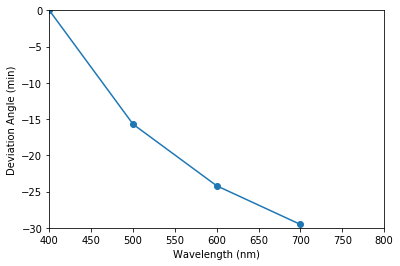

In [69]:
plt.figure();
plt.plot(l, D_degs, '-o');
plt.axis([400, 800, -30, 0]);
plt.xlabel('Wavelength (nm)');
plt.ylabel('Deviation Angle (min)');

## Gratings
- **Example 7.3**: Calculate the emergent angles of the orders m = 0, 1, 2, 3 using a reflection grating.

In [5]:
# grating parameters

lambda_nm = 550    # incident wavelength (nm)
alpha_deg = 10     # incident angle (deg)
lpmm = 500         # lines per mm in grating

# convert to m and radians
d = 1e-3 / lpmm
lambda_ = lambda_nm * 1e-9
alpha = alpha_deg * pi/180

In [6]:
# emergent angles for orders

m = np.array([0, 1, 2, 3])
beta = arcsin(m * lambda_/d - sin(alpha)) * 180/pi   # in deg
beta

array([-10.        ,   5.81701973,  22.10788838,  40.64360119])

## Blazed gratings
- **Example 7.4**: Extend the calculation in example 7.3 to determine the m = 1 blaze angle.

In [8]:
# parameters

lambda_ = 550e-9  # wavelength (nm)
m = 1

lpmm = 500
d = 1e-3 / lpmm
FSR = lambda_ / m # free spectral rangeyj

In [12]:
# blaze angle

theta_blaze = arcsin(m * lambda_ / 2 / d)  * 180/pi  # step angle of groove (deg)
theta_blaze

7.903207733484589

## Grisms
- **Example 7.5**: Calculate the design of a BK7 prism for a grating of 150 lines per mm and a direct-view wavelength of 600 nm.

In [13]:
# parameters

lambda_ = 600e-9      # wavelength (nm)
m = 1 
lpmm = 150
d = 1e-3 / lpmm
alpha = 10 * pi / 180
n_g = 1.52

In [26]:
# calculate prism angle

alpha = arcsin(m * lambda_ / d / (n_g - 1))
delta = (n_g - 1) * tan(alpha)

print('Prism wedge angle: {} degs'.format(alpha*180/pi))
print('Prism wedge angle: {} degs'.format(delta*180/pi))

Prism wedge angle: 9.966766300244691 degs
Prism wedge angle: 5.235634733617035 degs
